In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile


In [2]:
synth_df = pd.read_csv("./syth_voice_chunk_length_640_audio_data.csv")
synthesized_audio_data = synth_df["synthesized_audio_data"]

df = pd.read_csv("./audio_data.csv")

original_data = df["original_audio"]

In [3]:
sampling_rate = 16e3
duration = len(synthesized_audio_data) / sampling_rate
audio_time = np.linspace(0, duration, len(original_data))

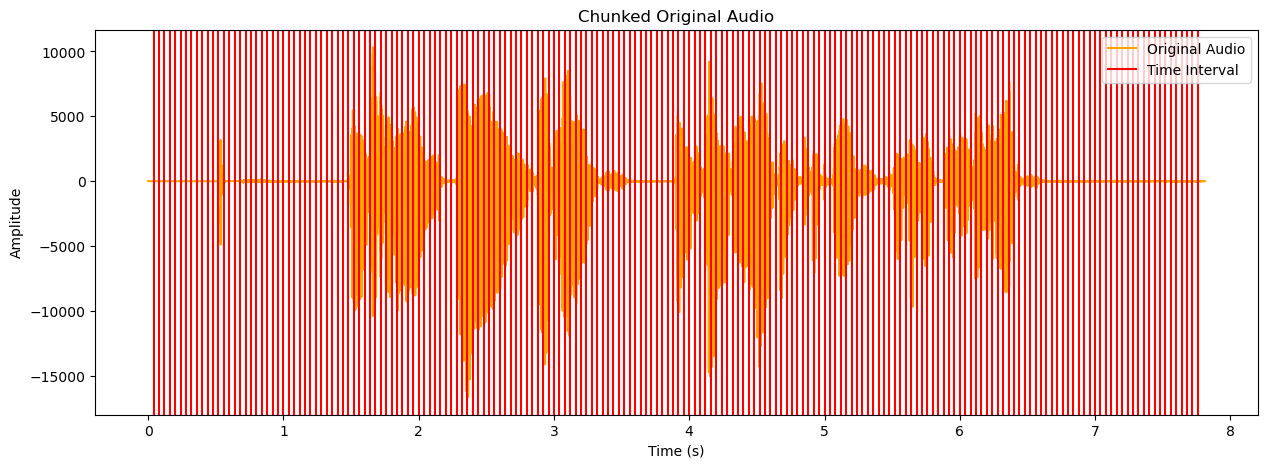

In [4]:
time_interval = 0.04  # 40 ms in seconds
vertical_line_positions = [i * time_interval for i in range(1, int(audio_time[-1] / time_interval))]


plt.figure(figsize=(15, 5))
plt.plot(audio_time, original_data, color="orange")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Chunked Original Audio")

for pos in vertical_line_positions:
    plt.axvline(x=pos, color='red', linestyle='-')
    
plt.legend(["Original Audio", "Time Interval"], loc='upper right',)

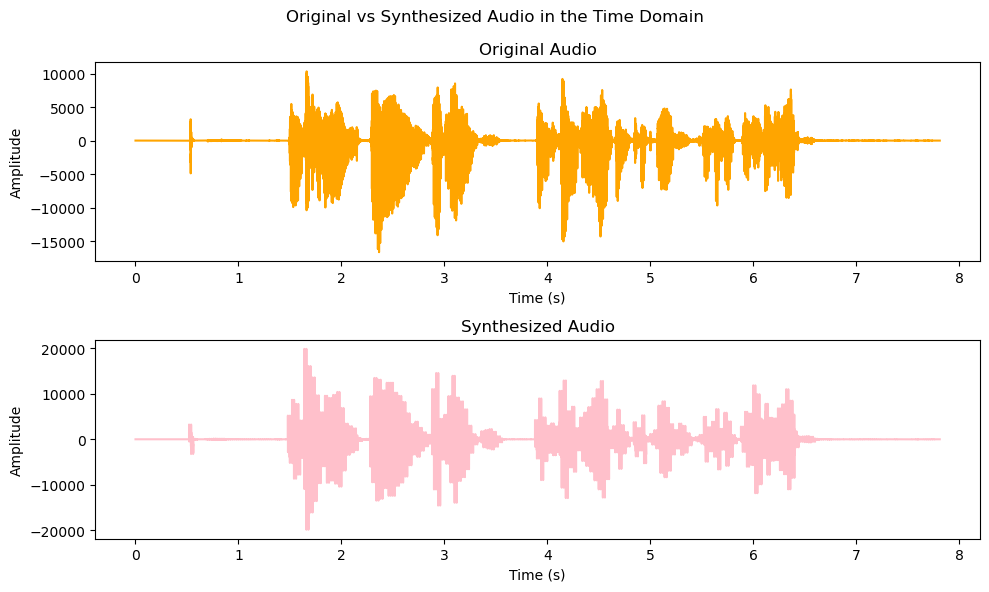

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
titles = ["Original Audio", "Synthesized Audio"]
colours = ["orange", "pink"]
for i, data in enumerate([original_data, synthesized_audio_data,]):
    axes[i].plot(audio_time, data, color=colours[i])
    axes[i].set_xlabel("Time (s)")
    axes[i].set_ylabel("Amplitude")
    axes[i].set_title(titles[i])
    
fig.suptitle("Original vs Synthesized Audio in the Time Domain")
plt.tight_layout()


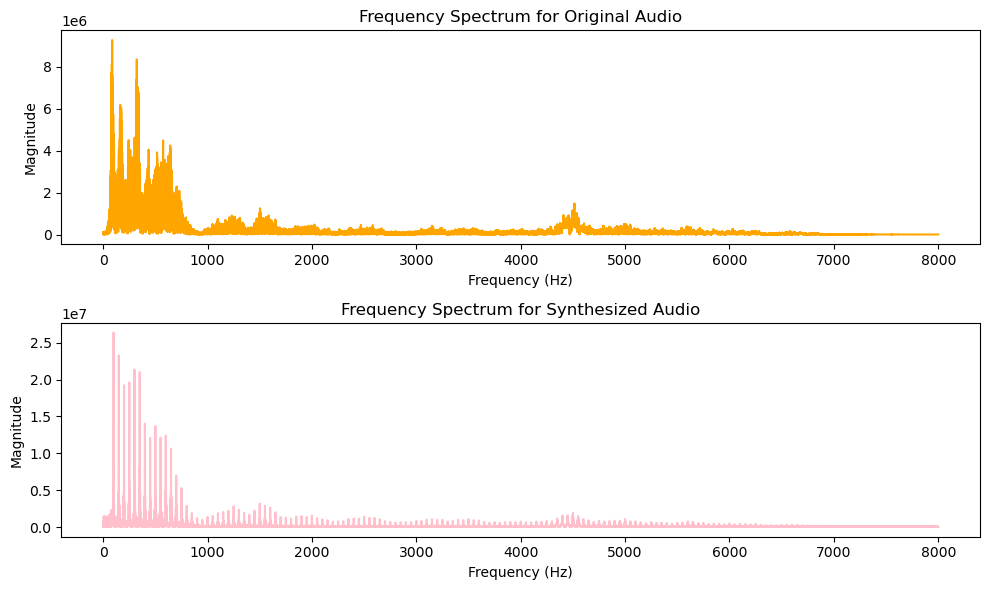

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
titles = ["Original Audio", "Synthesized Audio"]
colours = ["orange", "pink"]
for i, data in enumerate([original_data, synthesized_audio_data,]):
    fft_result = np.fft.fft(data)

    freq_axis = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)
    positive_freq_axis = freq_axis[:len(freq_axis) // 2]

    magnitude_spectrum = np.abs(fft_result)[:len(fft_result) // 2]

    axes[i].plot(positive_freq_axis, magnitude_spectrum, colours[i])
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Magnitude')    
    axes[i].set_title(f'Frequency Spectrum for {titles[i]}')
    
# fig.suptitle("Original vs Synthesized Audio in the Frequency Domain")
plt.tight_layout()

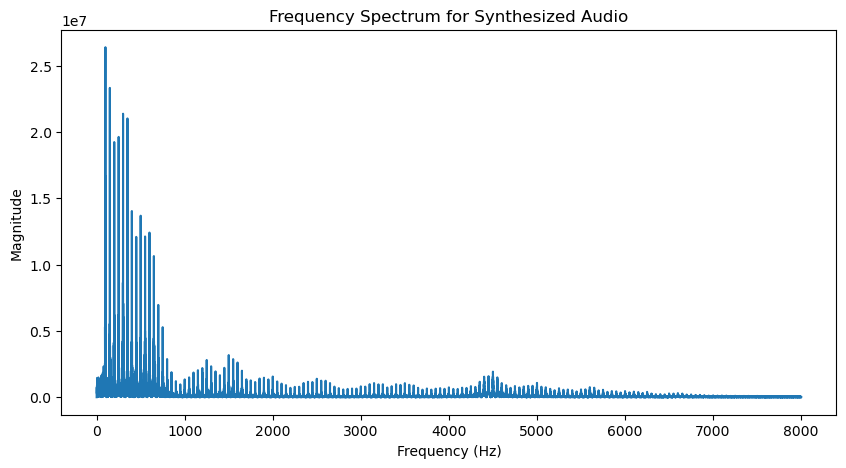

In [7]:
synth_fft_result = np.fft.fft(synthesized_audio_data)

freq_axis = np.fft.fftfreq(len(synth_fft_result), 1 / sampling_rate)
positive_freq_axis = freq_axis[:len(freq_axis) // 2]

synth_magnitude_spectrum = np.abs(synth_fft_result)[:len(synth_fft_result) // 2]

plt.figure(figsize=(10, 5))
plt.plot(positive_freq_axis, synth_magnitude_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum for Synthesized Audio')
plt.show()

In [8]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

N = 3 # Filter order
bandpass_region = [1, 100]    

z, p, k = signal.butter(N, bandpass_region, btype='bandpass', output='zpk', fs=16e3)

print("Zeros: ", z)
print("Poles: ", p)
print("System Gain: ", k)

numerator = np.poly(z)  # Polynomial coefficients of the zeros
denominator = np.poly(p)  # Polynomial coefficients of the poles

num_str = " * ".join([f"(s - ({zi.real:.2f} + {zi.imag:.2f}j))" for zi in z])
denom_str = " * ".join([f"(s - ({pi.real:.2f} + {pi.imag:.2f}j))" for pi in p])
transfer_function_str = f"H(s) = {k:.2e} * ({num_str}) / ({denom_str})"

print("Transfer Function:")
print(transfer_function_str)



Zeros:  [ 1.+0.j  1.+0.j  1.+0.j -1.+0.j -1.+0.j -1.+0.j]
Poles:  [0.99980563-0.00034339j 0.99959928+0.j         0.99980563+0.00034339j
 0.98037464+0.03336163j 0.96224497+0.j         0.98037464-0.03336163j]
System Gain:  7.067635598284157e-06
Transfer Function:
H(s) = 7.07e-06 * ((s - (1.00 + 0.00j)) * (s - (1.00 + 0.00j)) * (s - (1.00 + 0.00j)) * (s - (-1.00 + 0.00j)) * (s - (-1.00 + 0.00j)) * (s - (-1.00 + 0.00j))) / ((s - (1.00 + -0.00j)) * (s - (1.00 + 0.00j)) * (s - (1.00 + 0.00j)) * (s - (0.98 + 0.03j)) * (s - (0.96 + 0.00j)) * (s - (0.98 + -0.03j)))


In [9]:
andpass_region = [50, 150]    

z, p, k = signal.butter(N, bandpass_region, btype='bandpass', output='zpk', fs=16e3)

print("Zeros: ", z)
print("Poles: ", p)
print("System Gain: ", k)

numerator = np.poly(z)  # Polynomial coefficients of the zeros
denominator = np.poly(p)  # Polynomial coefficients of the poles

num_str = " * ".join([f"(s - ({zi.real:.2f} + {zi.imag:.2f}j))" for zi in z])
denom_str = " * ".join([f"(s - ({pi.real:.2f} + {pi.imag:.2f}j))" for pi in p])
transfer_function_str = f"H(s) = {k:.2e} * ({num_str}) / ({denom_str})"

print("Transfer Function:")
print(transfer_function_str)

Zeros:  [ 1.+0.j  1.+0.j  1.+0.j -1.+0.j -1.+0.j -1.+0.j]
Poles:  [0.99980563-0.00034339j 0.99959928+0.j         0.99980563+0.00034339j
 0.98037464+0.03336163j 0.96224497+0.j         0.98037464-0.03336163j]
System Gain:  7.067635598284157e-06
Transfer Function:
H(s) = 7.07e-06 * ((s - (1.00 + 0.00j)) * (s - (1.00 + 0.00j)) * (s - (1.00 + 0.00j)) * (s - (-1.00 + 0.00j)) * (s - (-1.00 + 0.00j)) * (s - (-1.00 + 0.00j))) / ((s - (1.00 + -0.00j)) * (s - (1.00 + 0.00j)) * (s - (1.00 + 0.00j)) * (s - (0.98 + 0.03j)) * (s - (0.96 + 0.00j)) * (s - (0.98 + -0.03j)))


In [15]:
def get_rms(signal):
    return np.sqrt(np.mean(signal**2))

print("RMS of original audio", get_rms(original_data))
print("RMS of synthesized audio", get_rms(synthesized_audio_data))

RMS of original audio 1614.4265950456745
RMS of synthesized audio 1436.664217844955


In [20]:
print("max abs value of original audio", np.max(np.abs(original_data)))
print("max absvalue of synthesized audio", np.max(np.abs(synthesized_audio_data)))

max abs value of original audio 16652
max absvalue of synthesized audio 19852.32486216522


In [18]:
np.max(np.abs(original_data))

16652

In [19]:
np.max(original_data)

10326